In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# reference
https://qiita.com/Mony0_S/items/a04b12564973ff4b41b6

In [2]:
def ridge_solution(x, y, alpha=1.0):
    # return np.linalg.inv(alpha * x.T @ x + np.eye(x.shape[1])) @ x.T @ y
    return np.linalg.inv(x.T @ x + 1/alpha * np.eye(x.shape[1])) @ x.T @ y

def expansion_term(x, alpha):
    return np.linalg.inv(alpha * x @ x.T + np.eye(x.shape[0]))

def textbook_formula_16_3_6_left(x, y, alpha):
    return np.linalg.inv(alpha * x @ x.T + np.eye(x.shape[0]))@y

def textbook_formula_16_3_6_right(x, y, q):
    return y-x@q



In [3]:
Z = np.array([[0,1,2,1],
              [1,3,0,2],
              [1,2,1,0]]) # n x m
z = Z[:,0]
# z = np.random.randn(3) # n x 1
alpha = 3

q = ridge_solution(Z, z, alpha)
e = expansion_term(Z, alpha)
text_left = textbook_formula_16_3_6_left(Z, z, alpha)
text_right = textbook_formula_16_3_6_right(Z, z, q)

print('q: ', q)
print('e: ', e)
print('text_left: ', text_left)
print('text_right: ', text_right)

q:  [ 0.26268586  0.35827236 -0.06726457 -0.16851546]
e:  [[ 0.08874203 -0.00778853 -0.04743923]
 [-0.00778853  0.05121548 -0.05168751]
 [-0.04743923 -0.05168751  0.1397215 ]]
text_left:  [-0.05522776 -0.00047203  0.08803399]
text_right:  [-0.05522776 -0.00047203  0.08803399]


weight(q):  [ 0.69747939  0.07212156  0.30629282 -0.16696467]
pred z: [0.93025206 0.05954841]
update2 : [ 0.06974794 -0.05954841]
weight(q):  [0.07212156 0.3199576  0.25264251 0.3654681 ]
pred z: [0.69989463 0.6690701 ]
update2 : [0.00721216 0.03803668]
weight(q):  [0.30629282 0.25264251 0.29075618 0.19731166]
pred z: [0.83539612 0.49490024]
update2 : [0.03062928 0.00509976]
weight(q):  [-0.16696467  0.3654681   0.19731166  0.50871849]
pred z: [0.51669647 0.79764394]
update2 : [-0.01669647  0.06838146]


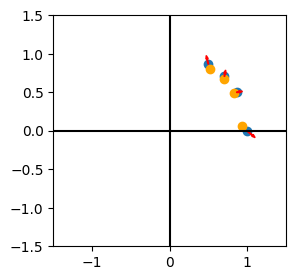

In [4]:
Z = np.array([[1,np.sqrt(2)/2,np.cos(np.pi*1/6),np.cos(np.pi*2/6)],
              [0,np.sqrt(2)/2,np.sin(np.pi*1/6),np.sin(np.pi*2/6)]]) # n x m
# Z = Z[:,:2]
alpha = 10
fig = plt.figure(figsize=(3,3))
plt.scatter(Z[0,:], Z[1,:])
plt.plot([0,0], [-2,2], '-k')
plt.plot([-2,2], [0,0], '-k')
for sample_id in range(Z.shape[1]):
    z = Z[:,sample_id]
    # z = np.random.randn(3) # n x 1
    e = expansion_term(Z, alpha)
    q = ridge_solution(Z, z, alpha)
    update = alpha * e @ Z[:,sample_id]
    update2 = z - Z @ q
    pred_z = Z @ q
    print('weight(q): ', q)
    print('pred z:', pred_z)
    print('update2 :', update2)
    plt.scatter(pred_z[0], [pred_z[1]], c='orange')
    plt.arrow(z[0], z[1], update2[0], update2[1], color='r', width=0.01)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()


weight(q):  [0.5 0. ]
pred z: [0.5 0. ]
update2 : [0.5 0. ]
weight(q):  [0.  0.5]
pred z: [0.  0.5]
update2 : [0.  0.5]


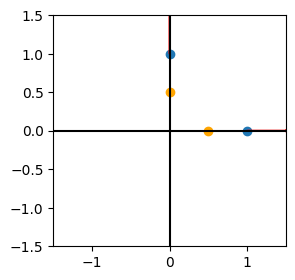

In [5]:
Z = np.array([[1,0,np.cos(np.pi*1/6),np.cos(np.pi*2/6)],
              [0,1,np.sin(np.pi*1/6),np.sin(np.pi*2/6)]]) # n x m
Z = Z[:,:2]
alpha = 1
fig = plt.figure(figsize=(3,3))
plt.scatter(Z[0,:], Z[1,:])
plt.plot([0,0], [-2,2], '-k')
plt.plot([-2,2], [0,0], '-k')
for sample_id in range(Z.shape[1]):
    z = Z[:,sample_id]
    # z = np.random.randn(3) # n x 1
    e = expansion_term(Z, alpha)
    q = ridge_solution(Z, z, alpha)
    update = alpha * e @ Z[:,sample_id]
    update2 = z - Z @ q
    pred_z = Z @ q
    print('weight(q): ', q)
    print('pred z:', pred_z)
    print('update2 :', update2)
    plt.scatter(pred_z[0], [pred_z[1]], c='orange')
    plt.arrow(z[0], z[1], update2[0], update2[1], color='r', width=0.01)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()

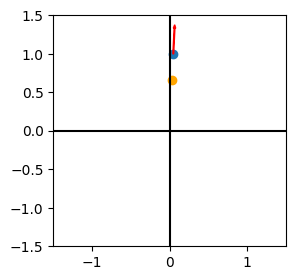

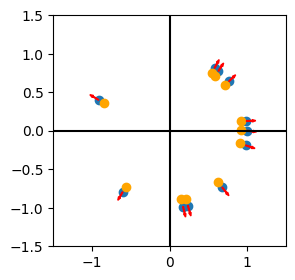

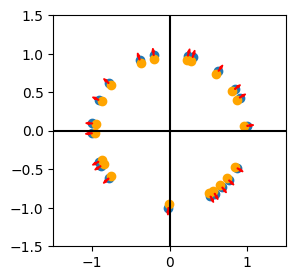

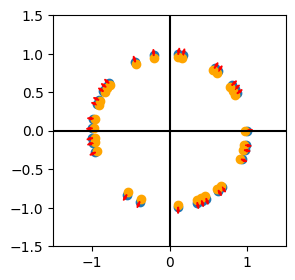

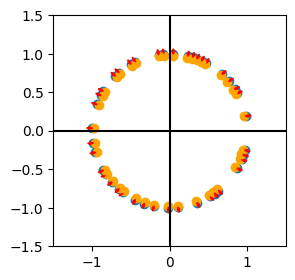

In [6]:
# Z = np.array([[1,np.sqrt(2)/2,np.cos(np.pi*1/6),np.cos(np.pi*2/6)],
#               [0,np.sqrt(2)/2,np.sin(np.pi*1/6),np.sin(np.pi*2/6)]]) # n x m
for m in range(1, 50, 10):
    angles = np.linspace(0, 2*np.pi, 100)
    angles = angles[random.sample(range(100), m)]
    Z = np.array([np.cos(angles), np.sin(angles)])
    # Z = Z[:,:2]
    alpha = 2
    fig = plt.figure(figsize=(3,3))
    plt.scatter(Z[0,:], Z[1,:])
    plt.plot([0,0], [-2,2], '-k')
    plt.plot([-2,2], [0,0], '-k')
    for sample_id in range(Z.shape[1]):
        z = Z[:,sample_id]
        # z = np.random.randn(3) # n x 1
        e = expansion_term(Z, alpha)
        q = ridge_solution(Z, z, alpha)
        update = alpha * e @ Z[:,sample_id]
        update2 = z - Z @ q
        pred_z = Z @ q
        # print('weight(q): ', q)
        # print('pred z:', pred_z)
        # print('update2 :', update2)
        plt.scatter(pred_z[0], [pred_z[1]], c='orange')
        plt.arrow(z[0], z[1], update2[0], update2[1], color='r', width=0.01)
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])
    plt.show()

update2 : [ 0.25077556 -0.21783358  0.18441169]
update2 : [-0.21783358  0.25077556  0.18441169]
update2 : [0.21473135 0.0432085  0.07794155]
update2 : [0.0432085  0.21473135 0.07794155]


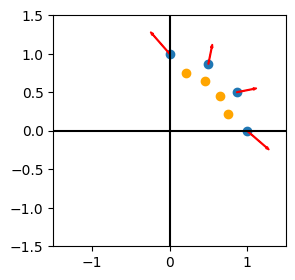

update2 : [ 0.36363636 -0.10497278  0.        ]
update2 : [-0.10497278  0.36363636  0.        ]
update2 : [0.26243194 0.09090909 0.        ]
update2 : [0.09090909 0.26243194 0.        ]


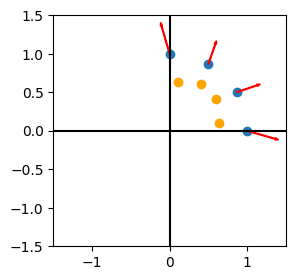

In [7]:
Z = np.array([[1,0,np.cos(np.pi*1/6),np.cos(np.pi*2/6)],
              [0,1,np.sin(np.pi*1/6),np.sin(np.pi*2/6)],
              [1,1,1,1]]) # n x m
alpha = 1
fig = plt.figure(figsize=(3,3))
plt.scatter(Z[0,:], Z[1,:])
plt.plot([0,0], [-2,2], '-k')
plt.plot([-2,2], [0,0], '-k')
for sample_id in range(Z.shape[1]):
    z = Z[:,sample_id]
    # z = np.random.randn(3) # n x 1
    e = expansion_term(Z, alpha)
    q = ridge_solution(Z, z, alpha)
    update = alpha * e @ Z[:,sample_id]
    update2 = z - Z @ q
    pred_z = Z @ q
    # print('weight(q): ', q)
    # print('pred z:', pred_z)
    print('update2 :', update2)
    plt.scatter(pred_z[0], [pred_z[1]], c='orange')
    plt.arrow(z[0], z[1], update2[0], update2[1], color='r', width=0.01)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()

Z = np.array([[1,0,np.cos(np.pi*1/6),np.cos(np.pi*2/6)],
              [0,1,np.sin(np.pi*1/6),np.sin(np.pi*2/6)],
              [0,0,0,0]]) # n x m
alpha = 1
fig = plt.figure(figsize=(3,3))
plt.scatter(Z[0,:], Z[1,:])
plt.plot([0,0], [-2,2], '-k')
plt.plot([-2,2], [0,0], '-k')
for sample_id in range(Z.shape[1]):
    z = Z[:,sample_id]
    # z = np.random.randn(3) # n x 1
    e = expansion_term(Z, alpha)
    q = ridge_solution(Z, z, alpha)
    update = alpha * e @ Z[:,sample_id]
    update2 = z - Z @ q
    pred_z = Z @ q
    # print('weight(q): ', q)
    # print('pred z:', pred_z)
    print('update2 :', update2)
    plt.scatter(pred_z[0], [pred_z[1]], c='orange')
    plt.arrow(z[0], z[1], update2[0], update2[1], color='r', width=0.01)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()

In [8]:
random.sample(range(m), int(m/30))
Z.shape

(3, 4)

update2 : ['0.325168', '0.062671', '-0.032913']


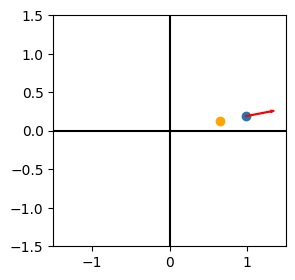

update2 : ['-0.007324', '0.078437', '-0.145639']
update2 : ['0.027947', '0.070942', '0.082758']
update2 : ['-0.088576', '0.020869', '-0.083306']
update2 : ['-0.081475', '-0.004915', '-0.038021']
update2 : ['-0.024793', '-0.070910', '-0.032315']
update2 : ['-0.086499', '0.020628', '0.066926']
update2 : ['-0.087360', '0.042016', '-0.057960']
update2 : ['0.063089', '0.028226', '-0.144700']
update2 : ['-0.035284', '-0.063677', '-0.029899']
update2 : ['0.049253', '-0.087916', '-0.102693']
update2 : ['-0.027754', '0.087231', '0.006335']


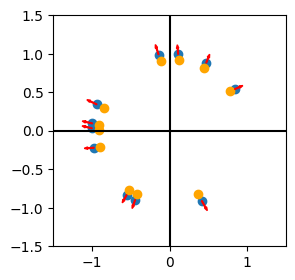

update2 : ['-0.041067', '0.004622', '0.048408']
update2 : ['0.044498', '0.001510', '-0.086988']
update2 : ['0.010644', '-0.042843', '-0.017312']
update2 : ['-0.036346', '-0.036736', '-0.073717']
update2 : ['-0.040223', '-0.008191', '-0.077422']
update2 : ['-0.041045', '-0.011735', '-0.067197']
update2 : ['-0.033937', '-0.047002', '0.016169']
update2 : ['0.033471', '-0.017412', '0.000455']
update2 : ['-0.045263', '-0.008837', '0.054291']
update2 : ['0.002373', '0.051680', '-0.191500']
update2 : ['0.002885', '-0.047799', '0.035168']
update2 : ['0.033235', '-0.015635', '0.047348']
update2 : ['0.041278', '0.029115', '0.037372']
update2 : ['0.029771', '-0.023389', '-0.004538']
update2 : ['0.015265', '-0.039541', '-0.062269']
update2 : ['-0.011522', '-0.051734', '-0.017421']
update2 : ['0.008285', '-0.044355', '-0.026496']
update2 : ['-0.003615', '-0.050133', '-0.009375']
update2 : ['0.009030', '0.050758', '0.044235']
update2 : ['0.039275', '-0.007054', '-0.022186']
update2 : ['0.047227', '0

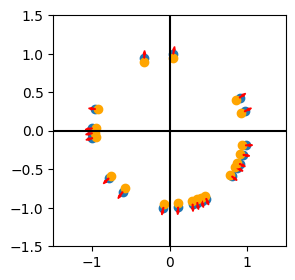

update2 : ['-0.020286', '0.020586', '-0.034393']
update2 : ['0.001971', '-0.028955', '-0.070997']
update2 : ['-0.027800', '-0.020562', '-0.031821']
update2 : ['-0.030474', '-0.018219', '-0.048583']
update2 : ['0.015175', '-0.024402', '-0.029273']
update2 : ['-0.001025', '0.028086', '0.016748']
update2 : ['0.010069', '0.027520', '-0.005580']
update2 : ['0.012288', '0.027544', '0.015431']
update2 : ['0.034837', '0.008405', '-0.017043']
update2 : ['-0.008039', '0.025233', '-0.069437']
update2 : ['-0.028322', '0.014490', '0.002624']
update2 : ['0.026192', '-0.016415', '0.013321']
update2 : ['0.009105', '-0.025112', '0.059614']
update2 : ['-0.021161', '-0.024228', '0.002793']
update2 : ['0.035438', '0.002425', '-0.058777']
update2 : ['0.024433', '-0.018751', '-0.037176']
update2 : ['-0.023522', '0.019862', '0.060745']
update2 : ['0.001134', '0.027719', '-0.013492']
update2 : ['-0.019285', '-0.024983', '0.007502']
update2 : ['-0.031455', '-0.015973', '-0.004938']
update2 : ['-0.031752', '0.0

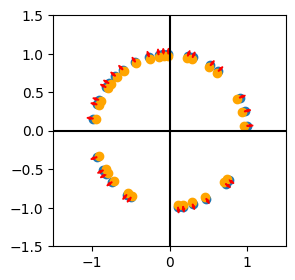

update2 : ['0.021864', '0.002536', '-0.049345']
update2 : ['0.016875', '0.018234', '0.021685']
update2 : ['0.012502', '0.022146', '0.020420']
update2 : ['-0.021852', '0.006579', '-0.072520']
update2 : ['0.016318', '-0.015550', '0.119575']
update2 : ['0.021690', '-0.005940', '-0.001722']
update2 : ['-0.022231', '0.003462', '-0.003527']
update2 : ['0.004085', '0.024391', '-0.024334']
update2 : ['0.005966', '-0.024557', '-0.026164']
update2 : ['-0.014098', '0.019425', '0.028687']
update2 : ['-0.021551', '0.006587', '-0.004010']
update2 : ['0.020095', '0.018648', '0.147727']
update2 : ['-0.019259', '-0.012725', '0.028050']
update2 : ['0.004966', '0.023071', '-0.069744']
update2 : ['-0.021931', '-0.007885', '-0.015114']
update2 : ['0.019462', '0.009093', '-0.096378']
update2 : ['0.017633', '0.016712', '0.006245']
update2 : ['-0.018988', '0.012655', '0.131297']
update2 : ['0.000386', '-0.022871', '0.105749']
update2 : ['0.006869', '0.023728', '-0.022720']
update2 : ['0.014248', '0.019243', '

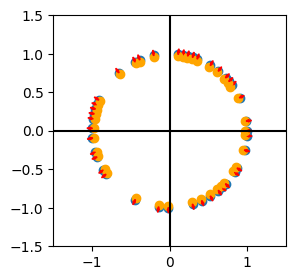

In [9]:
for m in range(1, 50, 10):
    angles = np.linspace(0, 2*np.pi, 100)
    angles = angles[random.sample(range(100), m)]
    Z = np.array([np.cos(angles), np.sin(angles), np.zeros(m)])
    # Z[2,random.sample(range(m), int(m/30))] = 0.5
    Z[2,:] = np.random.randn(m)* 0.1
    # Z = Z[:,:2]
    alpha = 2
    fig = plt.figure(figsize=(3,3))
    plt.scatter(Z[0,:], Z[1,:])
    plt.plot([0,0], [-2,2], '-k')
    plt.plot([-2,2], [0,0], '-k')
    for sample_id in range(Z.shape[1]):
        z = Z[:,sample_id]
        # z = np.random.randn(3) # n x 1
        e = expansion_term(Z, alpha)
        q = ridge_solution(Z, z, alpha)
        update = alpha * e @ Z[:,sample_id]
        update2 = z - Z @ q
        pred_z = Z @ q
        # print('weight(q): ', q)
        # print('pred z:', pred_z)
        print('update2 :', ['{:4f}'.format(u) for u in update2])
        plt.scatter(pred_z[0], [pred_z[1]], c='orange')
        plt.arrow(z[0], z[1], update2[0], update2[1], color='r', width=0.01)
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])
    plt.show()

In [11]:

print('z:', z)
print('weight(q): ', q)
print('pred z:', pred_z)
print('update2 :', ['{:4f}'.format(u) for u in update2])

z: [ 0.63055267 -0.77614646 -0.10218437]
weight(q):  [ 0.03372037 -0.01145421 -0.02278344 -0.02295024  0.0202799   0.03692671
 -0.03268971 -0.02773614  0.0509909  -0.05379451 -0.03658366 -0.0337962
 -0.01026831 -0.01529637 -0.01232905  0.03012502 -0.0049815  -0.07042228
  0.01437788 -0.02352617 -0.00613123 -0.03109744 -0.00722871  0.05447343
 -0.03341561 -0.047343    0.04184271  0.0449658   0.05733934  0.0045761
 -0.02778633 -0.04701022  0.04179954 -0.02163389 -0.04873873 -0.01272296
  0.03367423  0.04074881  0.03573395  0.03856154  0.06112668]
pred z: [ 0.61737492 -0.7554753  -0.04140963]
update2 : ['0.013178', '-0.020671', '-0.060775']


In [14]:
print(Z[:,-2])
print(Z[:,-1])

[ 0.72373404 -0.69007901  0.07439192]
[ 0.63055267 -0.77614646 -0.10218437]
